In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

## Part 1. K-Nearest Neughbors

In [41]:
test = pd.read_csv('data_assign2/test.csv', index_col = 'Unnamed: 0')
train = pd.read_csv('data_assign2/train.csv', index_col = 'Unnamed: 0')
train_answers = pd.read_csv('data_assign2/train_answers.csv', index_col = 'Unnamed: 0')
answers = pd.read_csv('data_assign2/real_answers_for_test.csv', index_col = 'Unnamed: 0')
train.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
562,-0.246378,0.305754,2.595219,0.462461,0.168272,0.604222,2.044178,2.093529,1.163667,1.181984,...,0.244412,2.730521,0.613604,0.043615,0.426575,3.477829,4.416446,1.815497,2.101646,3.386099
291,-0.252792,0.233517,-0.053349,0.205731,0.086315,-0.474245,-0.124576,-0.366220,-0.016409,0.263950,...,-0.010357,0.082417,0.046617,-0.133978,-0.041719,0.309567,-0.440035,0.514384,0.147219,0.051824
16,-0.246919,0.155724,0.183459,0.113437,0.078562,0.159934,-0.639524,-0.183248,0.096223,-0.816308,...,0.555350,0.830586,0.460286,0.420072,0.638208,-0.441817,0.104699,0.694469,0.263409,-0.100112
546,-0.246400,-1.055627,-0.685603,-1.072681,-0.917106,-0.153894,-1.072608,-0.985935,-1.109322,0.286071,...,-1.013384,-0.622680,-1.052065,-0.851273,-0.167798,-1.081563,-1.110206,-1.362851,-0.340088,-0.585000
293,-0.246616,-0.630543,-0.430402,-0.660381,-0.618627,-0.923606,-0.945392,-0.775172,-0.666346,0.249202,...,-0.650289,0.012226,-0.669349,-0.626918,0.210439,-0.515075,-0.679522,-0.348523,0.388270,-0.817652


In [42]:
print('Size of test dataset:', test.shape)
print('Size of train dataset:', train.shape)
print('Size of train_answers dataset:', train_answers.shape)
print('Size of answers dataset:', answers.shape)

Size of test dataset: (143, 31)
Size of train dataset: (426, 31)
Size of train_answers dataset: (426, 1)
Size of answers dataset: (143, 1)


In [43]:
distLst = [] # Count Euclidean distances between features
for i in range(len(test)):
    distFiller = []
    for j in range(len(train)):
        distance = np.linalg.norm(test.iloc[i] - train.iloc[j]) # Function to compute Euclidian Distance between every point
        distFiller.append(distance)
    distLst.append(distFiller)

In [44]:
def get_k_neighbors(array, k): # Sort 1D array in ascending order and return first K elements, in essence, smallest ones
    temp_arr = array.copy()
    temp_arr.sort()
    return temp_arr[0:k]

def get_k_indices(array, k_neigh): # Having smallest distances, find indices of these elements using this function
    indices = []
    for i in k_neigh:
        indices.append(array.index(i))
    return indices

def get_labels(y, k_indices): # Having indices of smallest distances, find labels from train data
    labels = []
    for i in k_indices:
        labels.append(y.iloc[i][0])
    return labels

def predict(k, distLst): # Having several labels, pick most common ones in the array of labels
    tempLst = distLst.copy()
    predictedLables = []
    for i in tempLst:
        k_neigh = get_k_neighbors(i, k)
        k_ind = get_k_indices(i, k_neigh)
        labels = get_labels(train_answers, k_ind)
        predictedLables.append(max(set(labels), key = labels.count))
    return predictedLables

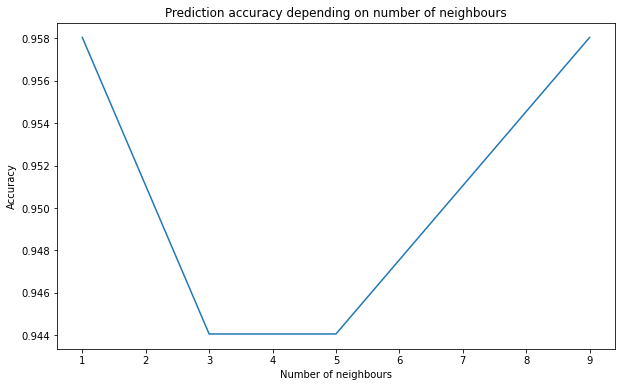

In [45]:
k1 = predict(1, distLst) # Predict labels with 1, 3, 5, 7 and 9 nearest neighbors
k3 = predict(3, distLst)
k5 = predict(5, distLst)
k7 = predict(7, distLst)
k9 = predict(9, distLst)

predictions = [k1, k3, k5, k7, k9]
accuracy = []
for i in predictions: # Count accuracy of predictions
    counter = 0
    for j in range(len(i)):
        if i[j] == answers.iloc[j][0]:
            counter+=1
    accuracy.append(counter/answers.shape[0])

plt.figure(figsize = (10, 6)) # Plot accuracy graph with respect to number of neighbors
plt.plot([1, 3, 5, 7, 9], accuracy)
plt.xlabel('Number of neighbours')
plt.ylabel('Accuracy')
plt.title('Prediction accuracy depending on number of neighbours')
plt.show()

## Part 2. K-Means Algorithm

In [2]:
data = scipy.io.loadmat('data_assign2/ex7data2.mat')
X = data['X']
initial_centroids = [[3, 3], [6, 2], [8, 5]] #itertations=10

In [3]:
def findClosestCentroids(X, centroids): #Count Eucledian Distances and return the smallest one
    closestCentroids = []
    for i in X:
        distances = []
        for j in centroids:
            distances.append(np.linalg.norm(i - j))
        closestCentroids.append(distances.index(min(distances)))
    return closestCentroids

In [4]:
def computeCentroids(X, idx):
    cluster0, cluster1, cluster2 = [], [], []
    for i in range(len(X)):
        if idx[i] == 0:
            cluster0.append(X[i])
        elif idx[i] == 1:
            cluster1.append(X[i])
        else:
            cluster2.append(X[i])
    clusters = [cluster0, cluster1, cluster2]
    centroids = []
    for clust in clusters:
        x, y = 0, 0
        for j in clust:
            x+=j[0]
            y+=j[1]
        centroids.append([x / len(clust), y / len(clust)])
    return centroids

In [38]:
centroids = initial_centroids.copy()
for i in range(10):
    idx = findClosestCentroids(X, centroids)
    centroids = computeCentroids(X, idx)
centroids

[[1.9539946648593873, 5.025570059426876],
 [3.0436711927398137, 1.0154104079486552],
 [6.033667356017604, 3.0005251118352563]]

Text(0.5, 1.0, 'K-Means Clustering')

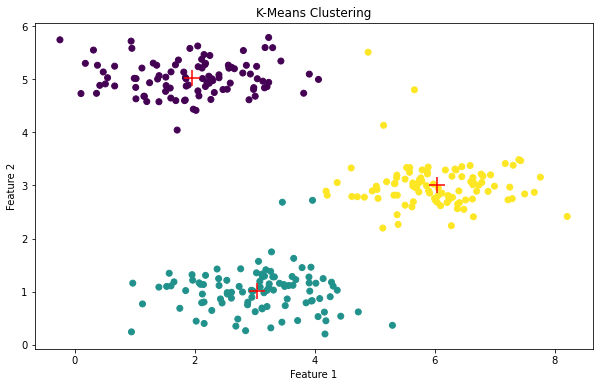

In [37]:
plt.figure(figsize = (10, 6))
plt.scatter(X[:,0], X[:, 1], c = idx)
plt.scatter(np.array(centroids)[:, 0], np.array(centroids)[:, 1], marker = '+', s = 250, c = 'red')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')